# Kernel SVM:


In [1]:
#import the libraries
import pandas as pd
df=pd.read_csv("Data/Match_Making.csv")
df.head()

,Female_Age,Male_Age,Match
0,24,30,1
1,30,40,1
2,22,49,0
3,43,39,1
4,23,30,1


In [2]:
features=df.iloc[:,:-1].values
labels=df.iloc[:,-1].values

In [3]:
#Spliting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.20,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

C:\Users\Manish Garg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn.svm import SVC
#linear,nonlinear,polynomial,radial basis function,sigmoid
a=SVC(kernel="rbf",random_state=0)



#Fitting the SVM to training set
a.fit(x_train,y_train)
a.predict(x_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

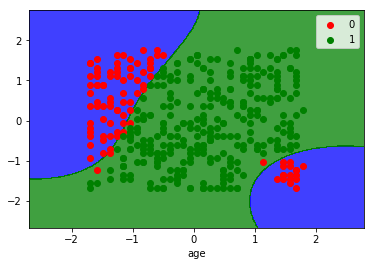

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Visualising the training set Results

from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,a.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('blue','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set== j, 0], x_set[y_set== j, 1],c=ListedColormap(('red','green'))(i), label=j)
plt.xlabel("age")
plt.legend() 
plt.show()

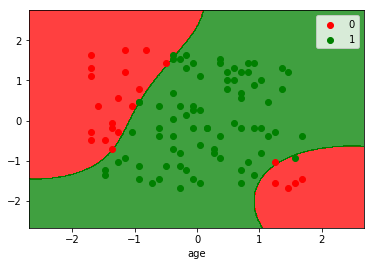

In [7]:
#Visualising the test set Results
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,a.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set== j, 0], x_set[y_set== j, 1],c=ListedColormap(('red','green'))(i), label=j)
plt.xlabel("age")
plt.legend() 
plt.show()